# Qiskit Certification Prep - Module 1: Quantum Circuit Operations

In [4]:
import qiskit
import numpy as np
# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, IBMQ
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import circuit_drawer

/var/folders/1g/pjkrsvtx455c4cm1_j7xrnz00000gp/T/ipykernel_35438/3761376563.py:1: FutureWarning: The `qiskit` package is not installed, only `qiskit-terra` is installed. Starting in Qiskit 1.0.0 only the `qiskit` package will be published. Migrate any requirements files still using `qiskit-terra` to use `qiskit` instead. See https://qisk.it/1-0-packaging-migration for more detail.
  import qiskit


## Section 0: Drawing circuits

*Drawing circuits:*
This is the first skill we'll learn because it'll help learn everything else in this section.
There are 2 options for drawing circuits: 

1). mpl 

2). text 

**mpl:**
- requires matplotlib to be installed

/opt/homebrew/anaconda3/envs/qiskit-cert/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


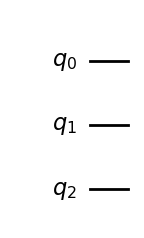

In [5]:
qc = QuantumCircuit(3)
qc.draw(output ='mpl') # mpl -> matplotlib

**Text**

In [6]:
qc = QuantumCircuit(3)
qc.draw(output = 'text')

q_0: 
     
q_1: 
     
q_2:

## Section 1: Creating Circuits

### Different ways to create a circuit with 2 qubits and 2 classical bits

| Method | Code |
|--------|------|
| Basic constructor | `qc = QuantumCircuit(2, 2)` |
| Using registers | `qr = QuantumRegister(2); cr = ClassicalRegister(2); qc = QuantumCircuit(qr, cr)` |
| Named registers | `qr = QuantumRegister(2, 'q'); cr = ClassicalRegister(2, 'c'); qc = QuantumCircuit(qr, cr)` 

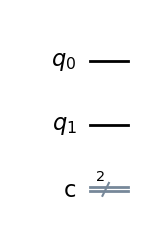

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(2, name='q')
cr = ClassicalRegister(2, name='c')
qc = QuantumCircuit(qr, cr)
qc.draw('mpl')

## Section 2: Gates and Measurements

### Different ways to apply gates and measure qubits

Most examples here use a 2-qubit circuit for consistency, but many operations (like applying H or measurement) work for circuits of size 1 or more.

| Operation | No. of Qubits Applied to | Method 1 | Method 2 |
|-----------|---------------|----------|----------|
| Apply H to qubit 0 | 1+ qubits (shown here for 1 qubit) | `qc.h(0)` | `qc.append(HGate(), [0])` |
| Apply CX from 0 to 1 | 2 qubits | `qc.cx(0, 1)` | `qc.append(CXGate(), [0, 1])` |
| Measure qubits to classical bits | 1+ qubits (shown here for 2 qubits) | `qc.measure([0,1], [0,1])` | `qc.measure_all()` |

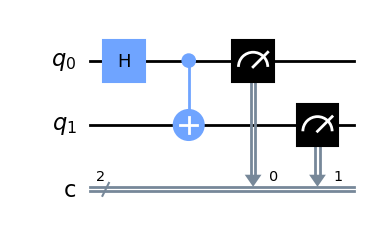

In [2]:
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])
qc.draw('mpl')

## Section 3: Circuit Properties

### Ways to inspect circuit characteristics

| Property | Code |
|----------|------|
| Gate counts | `qc.count_ops()` |
| Circuit depth | `qc.depth()` |
| Number of qubits | `qc.num_qubits` |
| Circuit width | `qc.width()` 

In [3]:
print("Depth:", qc.depth())
print("Width:", qc.width())
print("Operations:", qc.count_ops())

Depth: 3
Width: 4
Operations: OrderedDict([('measure', 2), ('h', 1), ('cx', 1)])


## Section 4: Subcircuits

### Ways to build and reuse subcircuits

| Operation | Code |
|-----------|------|
| Define subcircuit | `sub = QuantumCircuit(2); sub.h(0); sub.cx(0, 1)` |
| Append subcircuit | `qc.append(sub.to_instruction(), [0, 1])` |
| Reuse with name | `QuantumCircuit(2, name='sub')` 

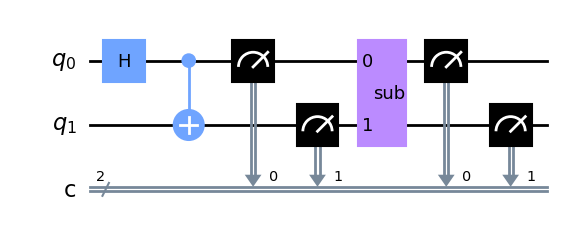

In [4]:
sub = QuantumCircuit(2, name="sub")
sub.h(0)
sub.cx(0, 1)
qc.append(sub.to_instruction(), [0, 1])
qc.measure([0,1], [0,1])
qc.draw('mpl')

## Section 5: Exporting and Importing QASM

### Exporting and importing circuit definitions

| Task | Code |
|------|------|
| Export QASM | `qc.qasm()` |
| Import from string | `QuantumCircuit.from_qasm_str(qasm_str)` |
| Import from file | `QuantumCircuit.from_qasm_file('filename.qasm')` 

OPENQASM 2.0;
include "qelib1.inc";
gate sub q0,q1 { h q0; cx q0,q1; }
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
sub q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
 ...


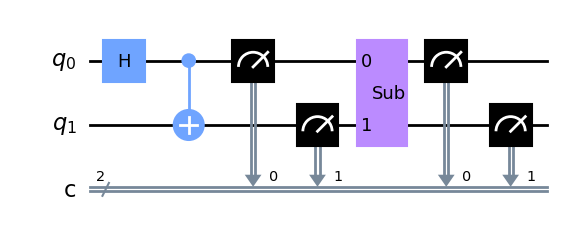

In [5]:
qasm_str = qc.qasm()
print(qasm_str[:300], "...")
qc_from_qasm = QuantumCircuit.from_qasm_str(qasm_str)
qc_from_qasm.draw('mpl')

## Section 6: Try It Yourself Prompts

### Exercises for students to practice

1. Add a `t` gate to qubit 1 and redraw the circuit.
2. Create a new 3-qubit circuit and apply a Toffoli gate (`ccx`).
3. Export the circuit to QASM and re-import it. Verify equality.
4. Use `count_ops()` and interpret the results.
5. Replace a subcircuit with a different one.

In [6]:
# Start your solution here